# <font size="+3" color=black ><b> <center><u>HR Analysis Case Study</u></center></b></font><br><a id="top"></a>

# <font color='Black'>Table of Contents:</font>
1. Look at the big picture
2. Get the data
3. Exploratory Data Analysis and Visualization the data to gain insights
    - Numerical Value Visualization
    - Categorical Variable Visualization
4. Data Preprocessing


## <font color='black'>1- Look at the big picture </font>

- A multinational company with numerous branches aims to implement an employee promotion system, contingent upon the fulfillment of specific criteria by the employee.
- However, the HR department faces a signifcant challenge in manually processing and evaluating the vast amount of data required to make promotion decisions.
- To address this, we propose developing a predictive model that can learn from the data and accurately identify the key factors that determine an employee's eligibility for promotion

 ## <font color='black'>2- Get The Data </font>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

np.random.seed(42)

In [ ]:
#Reading the datasets
hr_train = pd.read_csv("train.csv")
hr_test = pd.read_csv("test.csv")

 ### <font color='black'>2.1- Take a Quick Look At The Data </font>

In [ ]:
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


- each row represents an employee in the company.
- there are a 14 attributes

In [ ]:
hr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


- there are 54,808 istances, Notice education has 52399 non-null, meaning that 2,409 cell are missing & previous_year_rating has 50684 non-null, meaning that 4,124 cell are missing.We will need to take care of this later
- 9 attributes are numerical, 5 object ( we need to what categories exist and how many employee belong to each category

In [ ]:
# Visualizing the null values using missingo function
# import missingno as msno
# msno.bar(hr_train,color='y')

In [ ]:
# check duplicated entries in Train dataframe
DuplicatedValues = hr_train.duplicated().sum()
print('Duplicated data (train) : ' , (DuplicatedValues))

Duplicated data (train) :  0


In [ ]:
# Check the unique id (possibility of founded duplicated id the point to something)
hr_train['employee_id'].nunique()

54808

- no problem in the employee_id

- we looked at the 5 object attributes, we noticed that values in the columns reptitve, which means it is a categorical attribute.
- we will check if it by using value_counts() method

In [ ]:
# storing the categorical column name into a list
categorical = []
for feature in hr_train.columns:
    if hr_train[feature].dtype == 'object':
        categorical.append(feature)

In [ ]:
categorical

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [ ]:
def bar_plot(category_value_counts,categorical):
    '''
    This function is used to plot the categories in each columns
    '''
    fig=px.bar(x=dep.index,y=dep.values,color=dep.index)
    fig.update_layout(
    title={'text':f' how many employee belong to each category in the {categorical} attributes',
           # set the position of the title in the center of the image
          'x':0.5,
           'y':0.9,
          'xanchor':'center',
          'yanchor':'top',
          'font':{'size':18,
                 'color':'black',
                 'family':'Arial, sns-serif'
                 }
          },

    xaxis_title=categorical+ ' types',
    yaxis_title='Counts',
    yaxis_gridcolor='lightgray',
    plot_bgcolor='white',

    font=dict(size=12,
                 color='black',
                 family='Arial, sns-serif'),

    margin=dict(l=50,
                r=50,
                b=50,
                t=100
    )

    )
    fig.show()

In [ ]:
dep=hr_train[categorical[0]].value_counts()
bar_plot(dep,categorical[0])

In [ ]:
dep=hr_train[categorical[1]].value_counts()
bar_plot(dep,categorical[1])

In [ ]:
dep=hr_train[categorical[2]].value_counts()
bar_plot(dep,categorical[2])

In [ ]:
dep=hr_train[categorical[3]].value_counts()
bar_plot(dep,categorical[3])

In [ ]:
dep=hr_train[categorical[4]].value_counts()
bar_plot(dep,categorical[4])

### Quick Exploration Findings

- there are 2 columns have missing values (education and previous year rating)
- we founded in the all categorical columns importance problem that cardanility in the portion of classes

## <font color='black'>3- Exploratory Data Analysis and Visualization the data to gain insights </font>

# 3.1- univariate data analytics

In [ ]:
fig = go.Figure(data=[go.Histogram(x=hr_train['age'])])
fig.update_layout(title={'text':'Distribution of Age of Employees',
                        # set the position of the title in the center of the image
                        'x':0.5,
                        'y':0.9,
                        'xanchor':'center',
                        'yanchor':'top',
                        'font':{'size':18,
                        'color':'black',
                        'family':'Arial, sns-serif'
                        }
                        },
                  title_font_size=30,
                  xaxis_title='Age',
                  yaxis_title='Frequency',
                  plot_bgcolor='white',
                  font=dict(size=12,
                  color='black',
                  family='Arial, sns-serif'))

fig.show()

- the distribution is skewed in the left

In [ ]:
fig = go.Figure(data=[go.Bar(x=hr_train['previous_year_rating'].value_counts().index,
                             y=hr_train['previous_year_rating'].value_counts().values,
                             marker_color=hr_train['previous_year_rating'].value_counts().index)])
fig.update_layout(title={'text':'Distribution of Previous year rating of the Employees',
                        'x':0.5,
                        'y':0.9,
                        'xanchor':'center',
                        'yanchor':'top',
                        'font':{'size':18,
                        'color':'black',
                        'family':'Arial, sns-serif'}},
                  title_font_size=30,
                  xaxis_title='Ratings',
                  yaxis_title='Count',
                  xaxis=dict(tickmode='linear'),
                  plot_bgcolor='white',
                  font=dict(size=12,
                  color='black',
                  family='Arial, sns-serif'))
fig.show()


- there are a high difference in the Distribution of Previous year rating of the Employees

In [ ]:
fig = go.Figure(data=[go.Histogram(x=hr_train['length_of_service'], marker_color='green')])
fig.update_layout(title={'text':'Distribution of Length of Service among the Employees',
                        'x':0.5,
                        'y':0.9,
                        'xanchor':'center',
                        'yanchor':'top',
                        'font':{'size':18,
                        'color':'black',
                        'family':'Arial, sns-serif'
                            }},
                  title_font_size=30,
                  xaxis_title='Length of Service in years',
                  yaxis_title='Count',
                  plot_bgcolor='white'

                 )
fig.show()


- the distribution is skewed in the left

In [ ]:
fig = go.Figure(data=[go.Histogram(x=hr_train['avg_training_score'], marker_color='green')])
fig.update_layout(title={'text':'Distribution of Length of avrage training score the Employees',
                        'x':0.5,
                        'y':0.9,
                        'xanchor':'center',
                        'yanchor':'top',
                        'font':{'size':18,
                        'color':'black',
                        'family':'Arial, sns-serif'
                            }},
                  title_font_size=30,
                  xaxis_title='Avrage training score',
                  yaxis_title='Count',
                  plot_bgcolor='white'

                 )
fig.show()


- i see the distribution of avg training score is good

In [ ]:
# Calculate value counts of length of service
KPIs_met_counts = hr_train['KPIs_met >80%'].value_counts().sort_index()

# Create bar chart
fig = go.Figure(data=[go.Bar(x=KPIs_met_counts.index, y=KPIs_met_counts.values,
                             marker_color=hr_train['KPIs_met >80%'].value_counts().index)])
fig.update_layout(title={'text':'Distribution of Employees in terms of KPI',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':18,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=30,
                  xaxis_title='KPI>80% met or not',
                  yaxis_title='Count',
                  plot_bgcolor='white'

                 )
fig.show()


- there are a high difference in the Distribution of KPI of the Employees

In [ ]:
size = [53538, 1270]
labels = ["Awards Won", "No Awards Won"]
colors = ['black', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=size, hole=0.7, marker=dict(colors=colors))])
fig.update_layout(title='Showing a Percentage of employees who won awards', title_font_size=30)
fig.show()


In [ ]:
# Calculate value counts of length of service
KPIs_met_counts = hr_train['is_promoted'].value_counts().sort_index()

# Create bar chart
fig = go.Figure(data=[go.Bar(x=KPIs_met_counts.index, y=KPIs_met_counts.values,
                             marker_color=hr_train['is_promoted'].value_counts().index)])
fig.update_layout(title={'text':'plot to show the gap in Promoted and Non-Promoted Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':18,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=30,
                  xaxis_title='0 -No Promotion and 1- Promotion',
                  yaxis_title='Count',
                  plot_bgcolor='white'

                 )
fig.show()


- the target attribute is imblanced

### Univariate Exploration Findings

- there are numeric features the distribution of it skewed to the left sould be solve it
(length of service,age) should be solved
- there are a significant problem it's the cardanility on a lot of numeric features
(awards or not,KPI,rating) should be solved
- the target attribute an imblanced

# 3.2- Multivariate data analytics

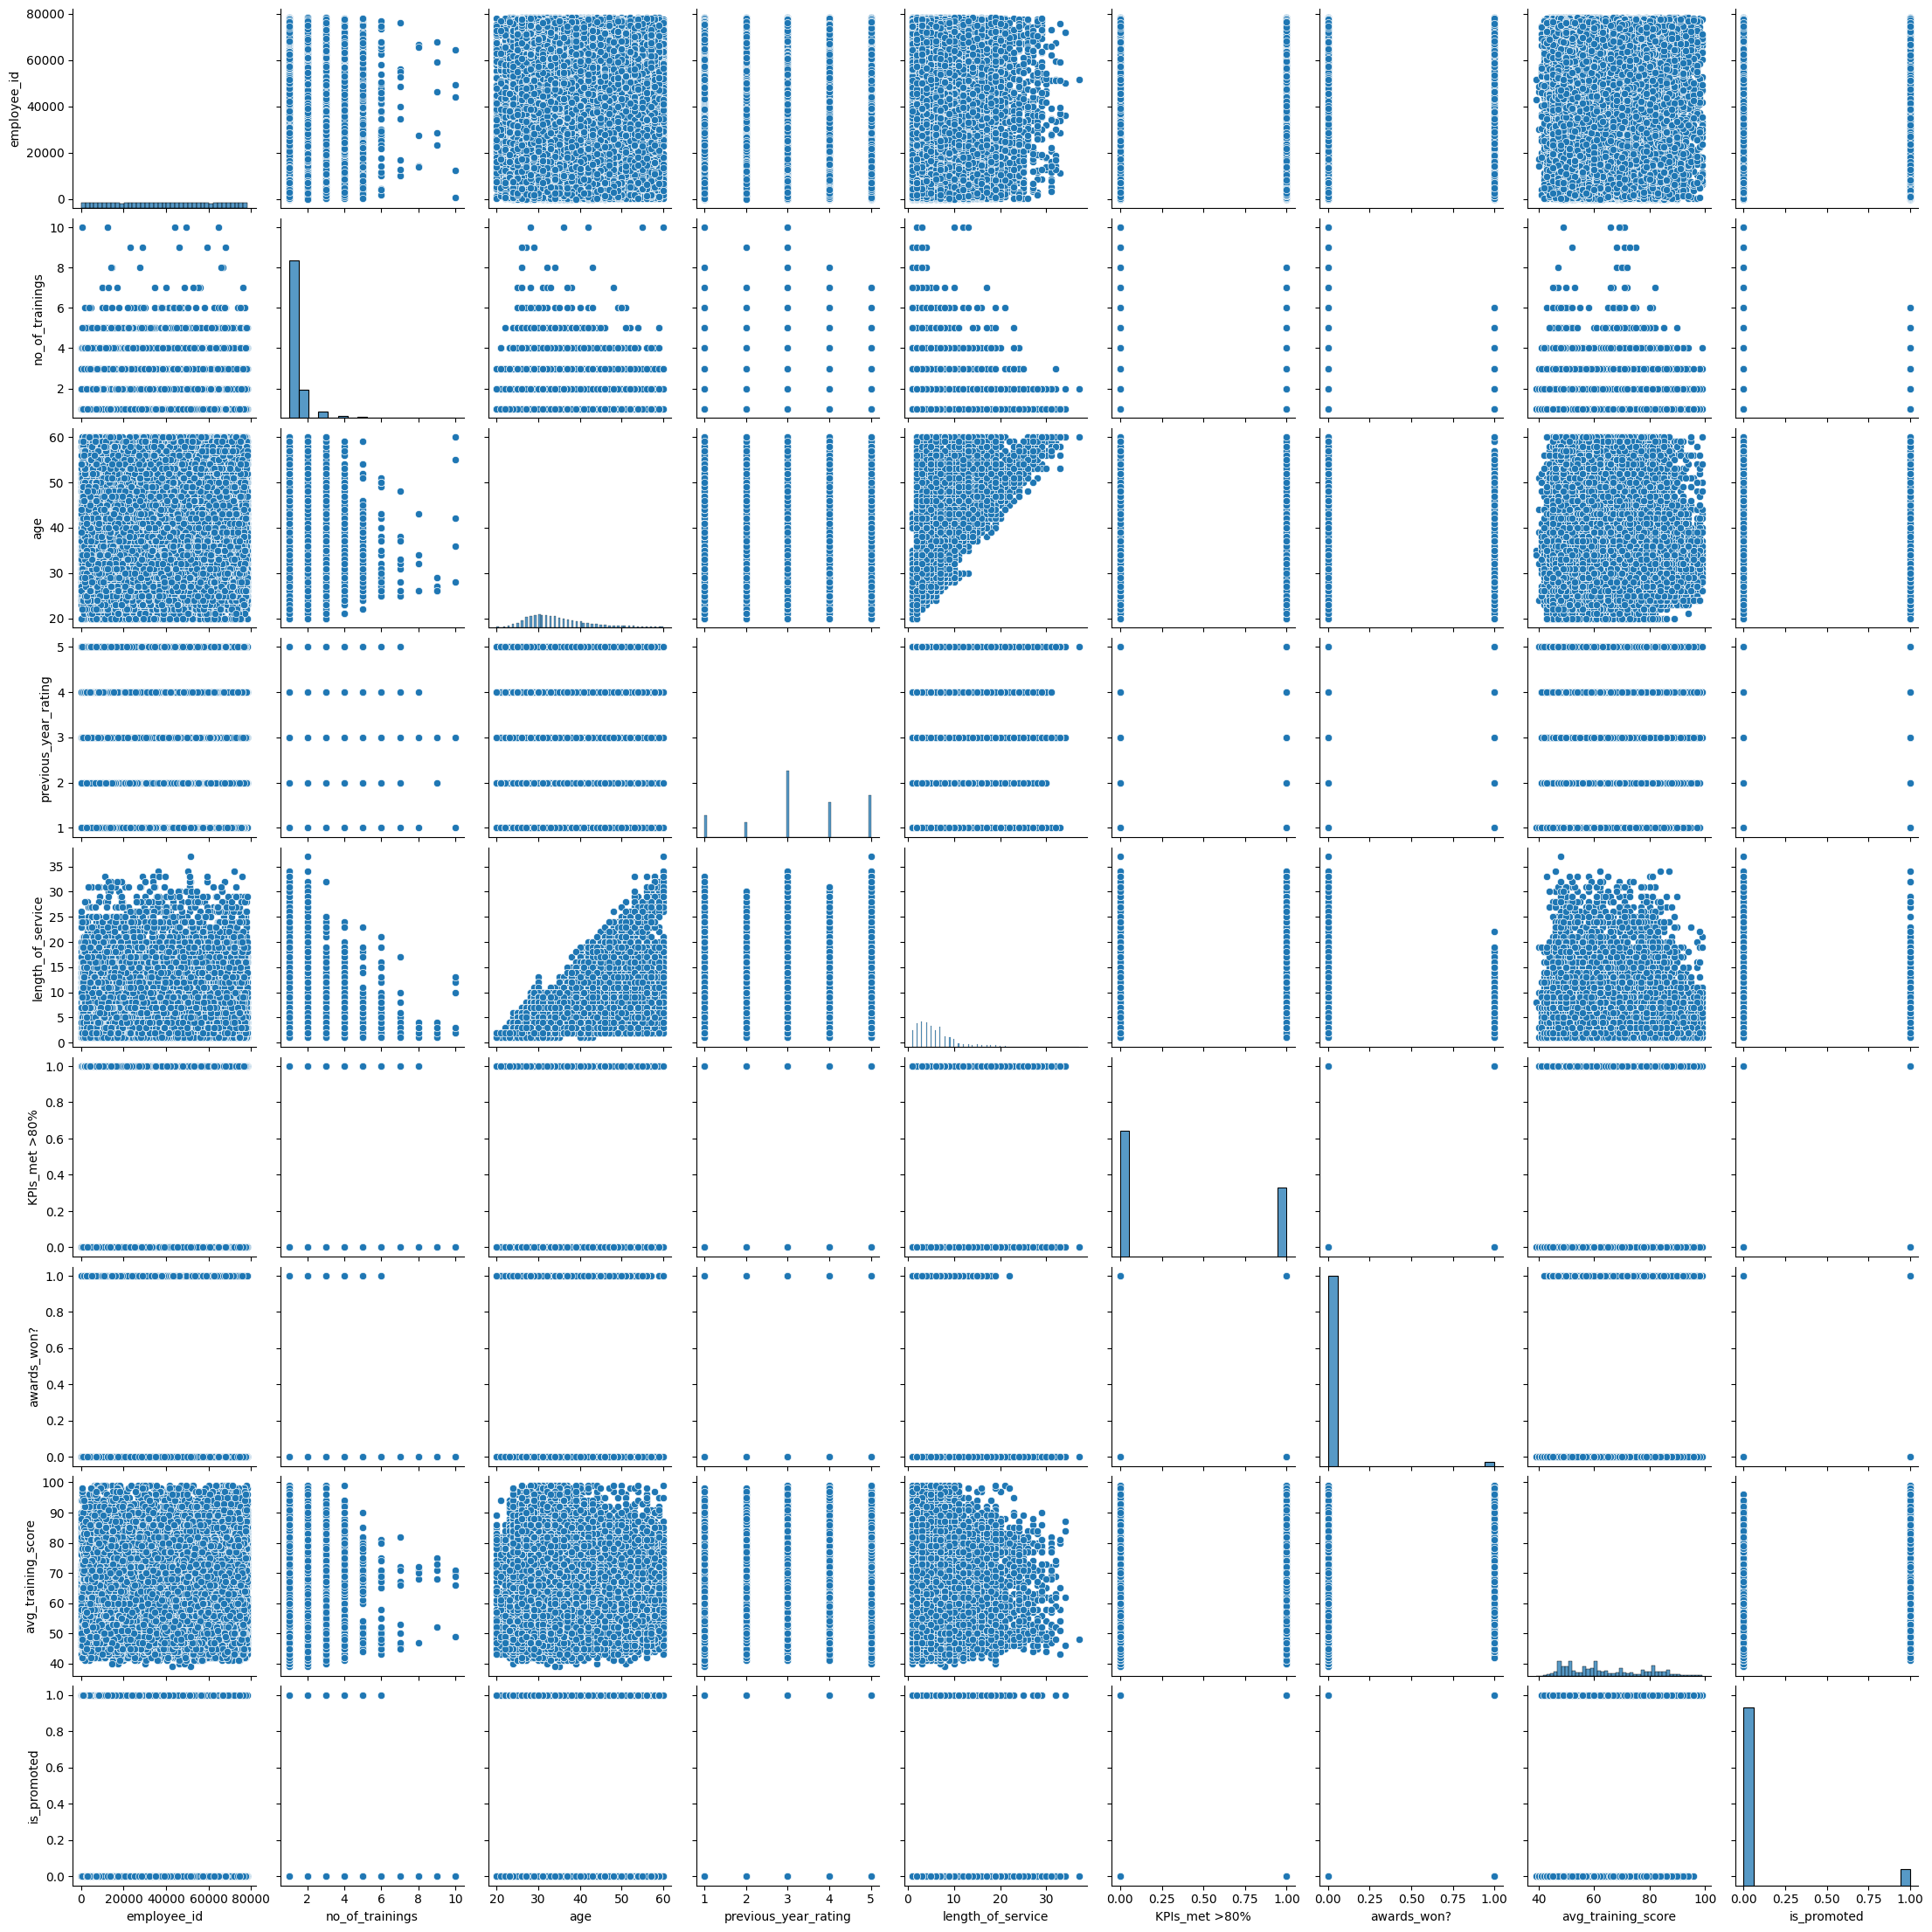

In [ ]:
sns.pairplot(hr_train,diag_kind="hist")

In [ ]:
corr_matrix=hr_train.corr()
fig=go.Figure(data=go.Heatmap(z=corr_matrix,
                             x=corr_matrix.columns,
                             y=corr_matrix.index,
                             colorscale="Viridis",
                             colorbar=dict(title="Correlation Cofficient")))
fig.update_layout(title={'text':'Correlation Matrix',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                   width=1000,
                   height=800,
                  plot_bgcolor='white'
                  )
fig.show()

ValueError: could not convert string to float: 'Sales & Marketing'

- we noticed that are features have a good effect on the target atrribute

    (Previous_year_rating,KPI_met,award_won,avg_training_score)


- we noticed that the features does not have any effect on the target value its

    (employee_id,no_of_trainings,age,length_of_service)


- we should ensure that is a correct predicated

In [ ]:
data = pd.crosstab(hr_train['avg_training_score'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns

    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Looking at the Dependency of Training Score in promotion',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},

                  title_font_size=30,
                  xaxis_title='Average Training Scores',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- As, the Training Scores Increases, the chances of Promotion Increases Highly (positive correlation)

In [ ]:
data = pd.crosstab(hr_train['no_of_trainings'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns

    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Looking at the Dependency of no of trainings in promotion',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},

                  title_font_size=30,
                  xaxis_title='Number of training',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- There's an inverse realathionship

In [ ]:
data = pd.crosstab(hr_train['region'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Regions in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Different Regions of the Company',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

In [ ]:
data = pd.crosstab(hr_train['awards_won?'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Awards in determining Promotion',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Awards Won or Not',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- There is a very good chance of getting promoted if the employee has won an award

In [ ]:
data = pd.crosstab(hr_train['KPIs_met >80%'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of KPIs in determining Promotion',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='KPIs Met or Not',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- Again Having a good KPI score increases the chances of getting promoted in the company.

In [ ]:
data = pd.crosstab(hr_train['previous_year_rating'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Previous year Ratings in determining Promotion',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Different Ratings',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases and there is completely no promotion for the employees with previous year ratings = 0

In [ ]:
data = pd.crosstab(hr_train['length_of_service'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Length of service in Promotions of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Length of service of employees',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- There's no effect the effect have equal no. of promotions showing an equal developement in each of the Length of service of the company

In [ ]:
data = pd.crosstab(hr_train['age'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Age in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Age of Employees',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company
- There's no effect

In [ ]:
data = pd.crosstab(hr_train['department'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Departments in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Different Departments of the Company',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

In [ ]:
data = pd.crosstab(hr_train['gender'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of Genders in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Gender',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


In [ ]:
data = pd.crosstab(hr_train['recruitment_channel'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of recruitment channel in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Channels',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


In [ ]:
data = pd.crosstab(hr_train['education'], hr_train['is_promoted'])
data_normalized = data.div(data.sum(1).astype(float), axis=0)
fig = go.Figure()

for col in data_normalized.columns:
    # add stacked columns
    fig.add_trace(go.Bar(x=data_normalized.index, y=data_normalized[col], name=col))
fig.update_layout(title={'text':'Dependency of education in determining Promotion of Employees',
                         'x':0.5,
                         'y':0.9,
                         'xanchor':'center',
                         'yanchor':'top',
                         'font':{'size':20,
                         'color':'black',
                         'family':'Arial, sns-serif'}},
                  title_font_size=25,
                  xaxis_title='Levels of Education',
                  yaxis_title='Proportion',
                  barmode='stack',
                  plot_bgcolor='white'
                 )
fig.show()


- The above plot shows that there is no partiality between males and females in terms of promotion


### Univariate Exploration Findings

- Features that have a high effect on the target attribute

    (no_of_trainings,previous_year_rating,KPIs_met,awards_won,avg_training_score)


- Other features does not have any effect on the promotion of the employees

# Feature Selction

In [ ]:
keep_org=hr_train.copy()
cols_to_drop=['employee_id','department','region','education','gender','recruitment_channel','age','length_of_service']
new_hr_train = hr_train.drop(cols_to_drop, axis = 1)

In [ ]:
new_hr_train

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,5.0,1,0,49,0
1,1,5.0,0,0,60,0
2,1,3.0,0,0,50,0
3,2,1.0,0,0,50,0
4,1,3.0,0,0,73,0
...,...,...,...,...,...,...
54803,1,3.0,0,0,78,0
54804,1,2.0,0,0,56,0
54805,1,5.0,1,0,79,0
54806,1,1.0,0,0,45,0


In [ ]:
# Check if any null values
msno.bar(new_hr_train,color='y')

NameError: name 'msno' is not defined

# 4. Data Preprocessing

### 4.1 - Data Cleaning

In [ ]:
new_hr_train['previous_year_rating'].fillna(1, inplace = True)

In [ ]:
msno.bar(new_hr_train,color='y')

NameError: name 'msno' is not defined

- no missing

In [ ]:
# Spliting Data
x = new_hr_train.iloc[:, :-1]
y = new_hr_train.iloc[:, -1]

# Building classification Models

In [ ]:
# splitting x and y into train and validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (43846, 5)
Shape of x_valid:  (10962, 5)
Shape of y_train:  (43846,)
Shape of y_valid:  (10962,)


# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

In [ ]:
predictions = DecisionTreeClassifierModel.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.83      0.11      0.20       921

    accuracy                           0.92     10962
   macro avg       0.88      0.56      0.58     10962
weighted avg       0.92      0.92      0.90     10962



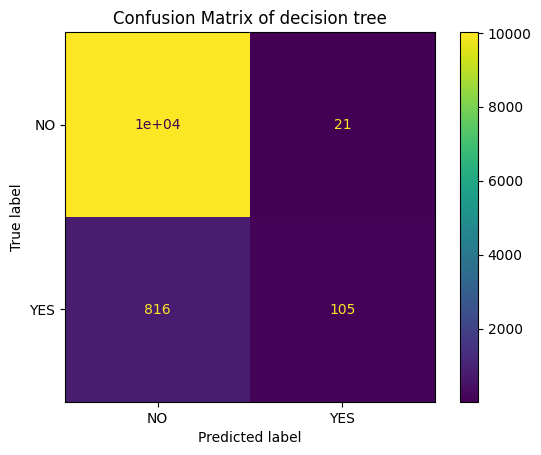

In [ ]:
tree_matrix = confusion_matrix(y_test,predictions)
tree_display = ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['NO','YES'])
tree_display.plot()
plt.title("Confusion Matrix of decision tree")
plt.show()

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_model = RandomForestClassifier(n_estimators=500)

In [ ]:
random_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
predictions=random_model.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10041
           1       0.71      0.18      0.28       921

    accuracy                           0.92     10962
   macro avg       0.82      0.58      0.62     10962
weighted avg       0.91      0.92      0.90     10962



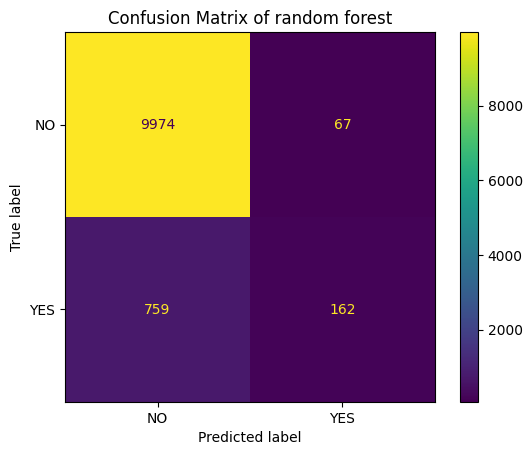

In [ ]:
random_matrix = confusion_matrix(y_test,predictions)
random_display = ConfusionMatrixDisplay(confusion_matrix = random_matrix, display_labels = ['NO','YES'])
random_display.plot()
plt.title("Confusion Matrix of random forest")
plt.show()

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train,y_train)

SVC()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.00      0.00      0.00       921

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



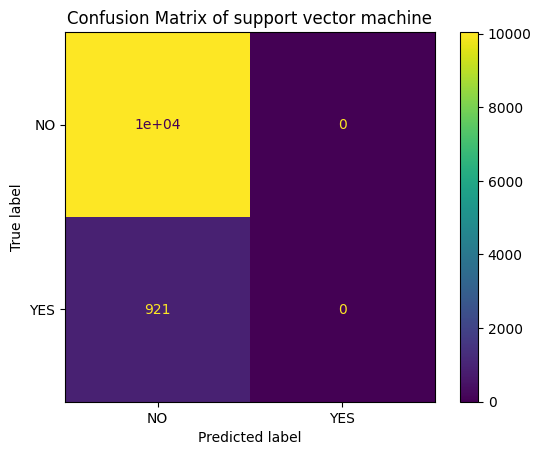

In [ ]:
svc_matrix = confusion_matrix(y_test,predictions)
svc_display = ConfusionMatrixDisplay(confusion_matrix = svc_matrix, display_labels = ['NO','YES'])
svc_display.plot()
plt.title("Confusion Matrix of support vector machine")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# تعريف نموذج Decision Tree
dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': np.arange(1, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)

# تدريب النموذج
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [ ]:
# print best parameter after tuning
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)


In [ ]:
grid_predictions = grid_search.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, grid_predictions))
tree = accuracy_score(grid_predictions,y_test)
print('decision tree accuracy: {:.2f}%'.format(tree*100))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10041
           1       0.79      0.17      0.28       921

    accuracy                           0.93     10962
   macro avg       0.86      0.58      0.62     10962
weighted avg       0.92      0.93      0.90     10962

decision tree accuracy: 92.66%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# تعريف نموذج Random Forest
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)

# تدريب النموذج
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
print(grid_search.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)


In [ ]:
grid_predictions = grid_search.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, grid_predictions))
forest = accuracy_score(grid_predictions,y_test)
print('random forest accuracy: {:.2f}%'.format(forest*100))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10041
           1       0.79      0.17      0.28       921

    accuracy                           0.93     10962
   macro avg       0.86      0.58      0.62     10962
weighted avg       0.92      0.93      0.90     10962

random forest accuracy: 92.66%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# تعريف نموذج SVC
svc_model = SVC()

param_grid = {
    'C': np.arange(1, 2),
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'shrinking': [True, False]
}

grid_search = GridSearchCV(svc_model, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)

# تدريب النموذج
grid_search.fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [ ]:
print(grid_search.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

In [ ]:
grid_predictions = grid_search.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, grid_predictions))
svcc = accuracy_score(grid_predictions,y_test)
print('svc accuracy: {:.2f}%'.format(svcc*100))

# clustring

In [ ]:
features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
X = hr_train[features]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
X.fillna(X.median(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Compu a\AppData\Local\Temp\ipykernel_34512\4172059618.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
hr_train['Cluster'] = kmeans.fit_predict(X_scaled)

E:\juppp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

E:\juppp\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "E:\juppp\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


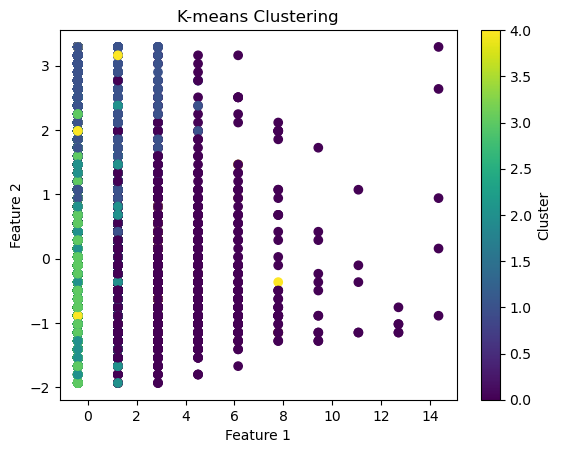

In [ ]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hr_train['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()
